# trafic sign detection


# author : Amr Elsaeed

In [1]:
! mkdir ~/.kaggle


In [2]:
!cp /content/drive/MyDrive/kaggle_creditional.json ~/.kaggle/kaggle.json

In [3]:
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

 97% 593M/612M [00:03<00:00, 205MB/s]
100% 612M/612M [00:03<00:00, 200MB/s]


In [ ]:
! unzip /content/gtsrb-german-traffic-sign.zip

In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [7]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()
#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join('/content/Train/'+str(i)) #/content/Train/0
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")


In [8]:
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [10]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [11]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [12]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [13]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))


Epoch 1/15
981/981 [==============================] - 19s 7ms/step - loss: 1.8536 - accuracy: 0.5293 - val_loss: 0.3550 - val_accuracy: 0.9134
Epoch 2/15
981/981 [==============================] - 7s 7ms/step - loss: 0.4913 - accuracy: 0.8598 - val_loss: 0.1476 - val_accuracy: 0.9611
Epoch 3/15
981/981 [==============================] - 6s 7ms/step - loss: 0.3257 - accuracy: 0.9103 - val_loss: 0.1055 - val_accuracy: 0.9740
Epoch 4/15
981/981 [==============================] - 7s 7ms/step - loss: 0.2596 - accuracy: 0.9284 - val_loss: 0.0881 - val_accuracy: 0.9790
Epoch 5/15
981/981 [==============================] - 7s 7ms/step - loss: 0.2662 - accuracy: 0.9285 - val_loss: 0.0947 - val_accuracy: 0.9773
Epoch 6/15
981/981 [==============================] - 10s 10ms/step - loss: 0.2404 - accuracy: 0.9386 - val_loss: 0.0839 - val_accuracy: 0.9751
Epoch 7/15
981/981 [==============================] - 11s 11ms/step - loss: 0.2316 - accuracy: 0.9398 - val_loss: 0.0787 - val_accuracy: 0.9802
E

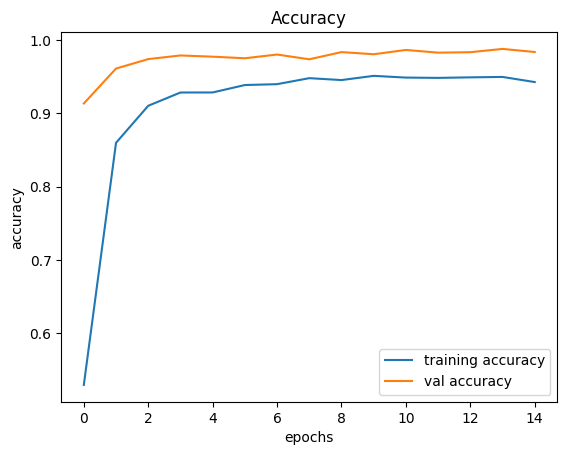

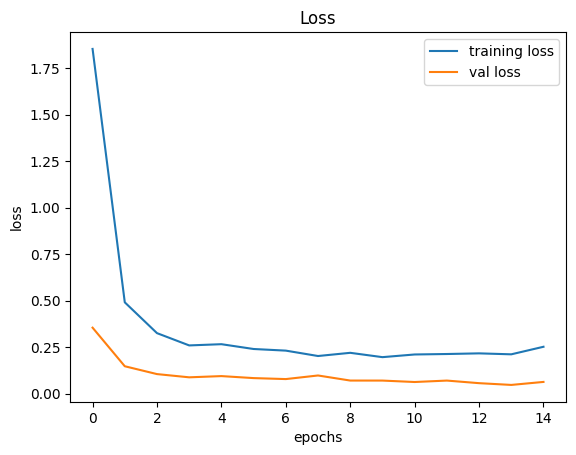

In [14]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [16]:
test = pd.read_csv('/content/Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
    try:
        image = Image.open(img)
        resize_image = image.resize((30,30))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)


pred = np.argmax(model.predict(X_test), axis=-1)

#Accuracy with the test data
from sklearn.metrics import accuracy_score 
print('Test Data accuracy: ',accuracy_score(labels, pred)*100)

395/395 [==============================] - 1s 3ms/step
Test Data accuracy:  94.6159936658749


In [17]:
from sklearn.metrics import classification_report

print(classification_report(labels, pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96        60
           1       0.98      0.96      0.97       720
           2       0.96      0.98      0.97       750
           3       0.90      0.93      0.91       450
           4       0.96      0.99      0.97       660
           5       0.89      0.96      0.93       630
           6       0.96      0.84      0.90       150
           7       1.00      0.88      0.94       450
           8       0.96      0.94      0.95       450
           9       0.92      1.00      0.96       480
          10       0.98      0.97      0.97       660
          11       0.89      0.96      0.92       420
          12       0.98      0.99      0.99       690
          13       0.98      0.99      0.99       720
          14       0.96      0.99      0.97       270
          15       0.93      1.00      0.96       210
          16       0.98      0.98      0.98       150
          17       1.00    

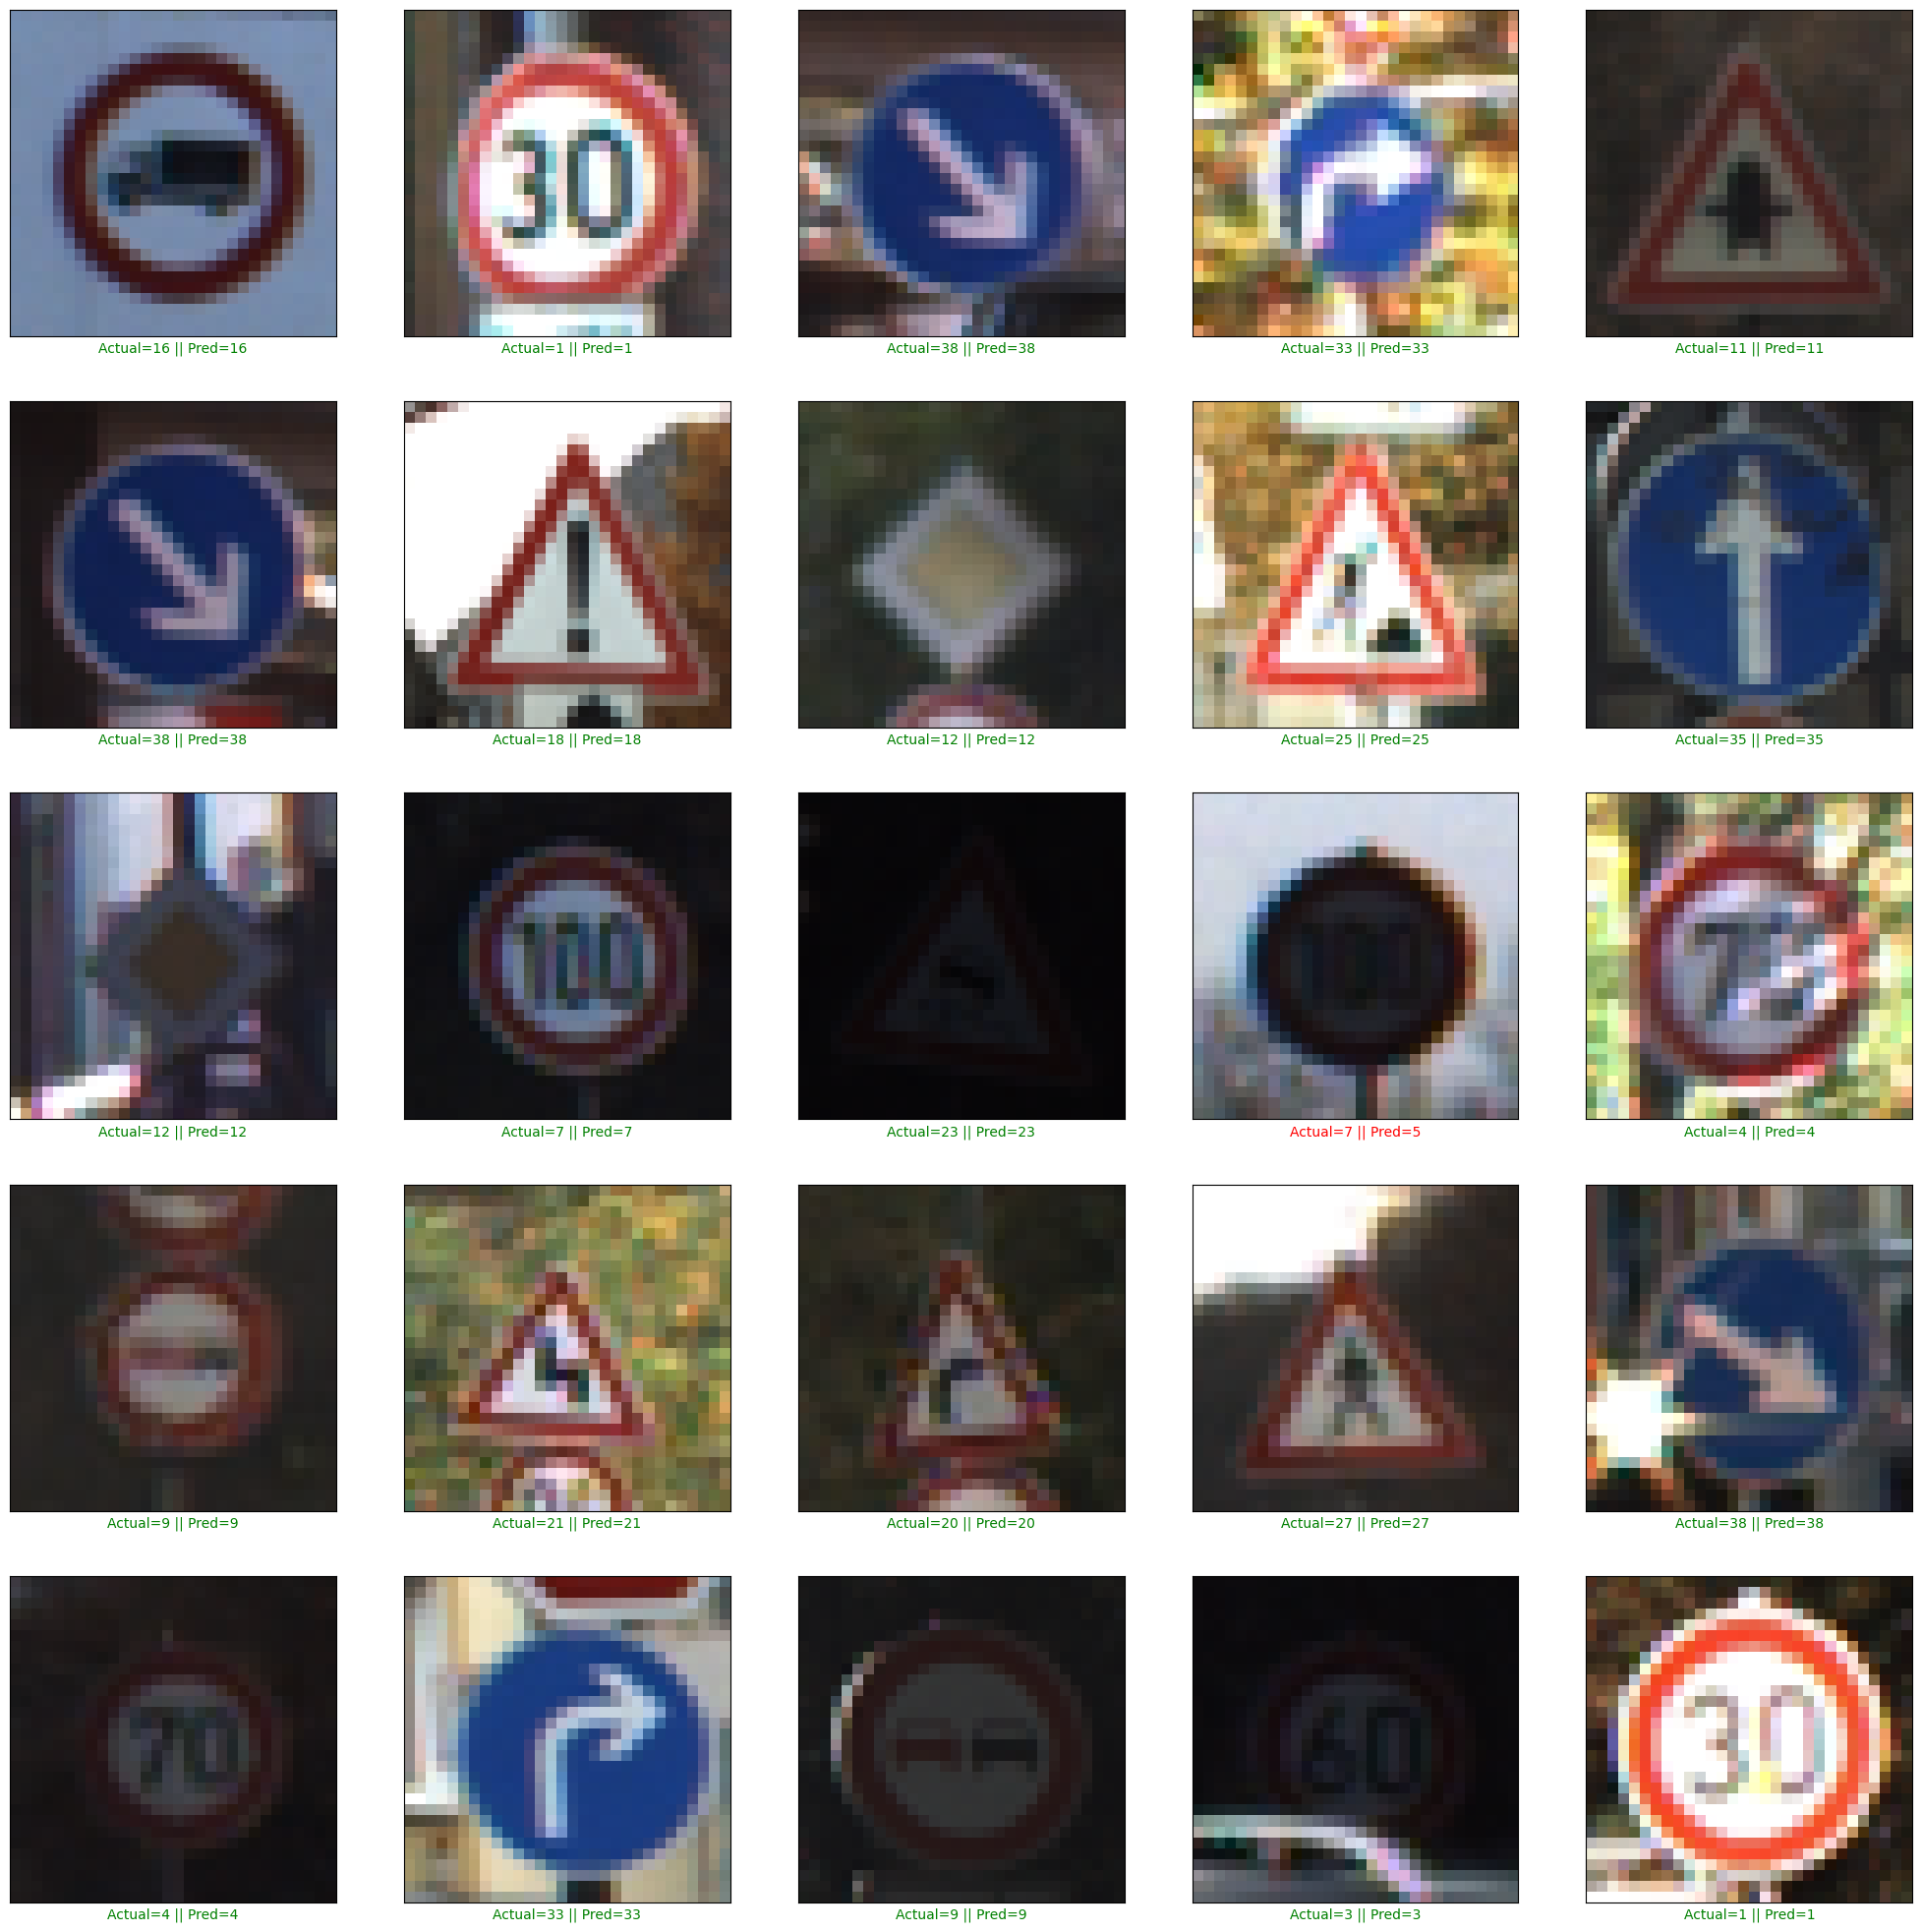

In [18]:
plt.figure(figsize = (25, 25))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()

In [19]:
model.save("trafic_sign.h5")